# Plant leaf disease detection:

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(225,225,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(3, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 1448 images belonging to 3 classes.


In [14]:
test_set=test_datagen.flow_from_directory('Data/test',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [15]:
from IPython.display import display

In [16]:
img_dims = 150
epochs = 20
batch_size = 32

In [17]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
45/45 [==============================] - 136s 3s/step - loss: 0.9314 - accuracy: 0.5650 - val_loss: 0.4894 - val_accuracy: 0.7781
Epoch 2/20
45/45 [==============================] - 131s 3s/step - loss: 0.5615 - accuracy: 0.7729 - val_loss: 0.7393 - val_accuracy: 0.6477
Epoch 3/20
45/45 [==============================] - 134s 3s/step - loss: 0.4943 - accuracy: 0.7917 - val_loss: 0.3935 - val_accuracy: 0.8391
Epoch 4/20
45/45 [==============================] - 127s 3s/step - loss: 0.4520 - accuracy: 0.8284 - val_loss: 0.2504 - val_accuracy: 0.9187
Epoch 5/20
45/45 [==============================] - 129s 3s/step - loss: 0.4401 - accuracy: 0.8234 - val_loss: 0.2846 - val_accuracy: 0.8977
Epoch 6/20
45/45 [==============================] - 128s 3s/step - loss: 0.4158 - accuracy: 0.8369 - val_loss: 0.3022 - val_accuracy: 0.8945
Epoch 7/20
45/45 [==============================] - 149s 3s/step - loss: 0.349

In [18]:
import h5py

In [19]:
Classifier.save('COVID_and_pnemonia.h5')
       

In [20]:
from keras.models import load_model

In [21]:
model=load_model('COVID_and_pnemonia.h5')

In [22]:
import numpy as np

In [23]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('test_c.jpg',target_size=(225,225))

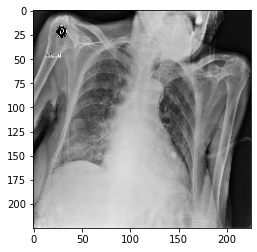

In [24]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [25]:
test_image=image.img_to_array(test_image)

In [26]:
test_image=np.expand_dims(test_image,axis=0)

In [27]:
result=model.predict(test_image)

In [28]:
prediction = result[0]

In [29]:
classes=training_set.class_indices

In [30]:
classes

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [31]:
prediction=list(prediction)

In [32]:
prediction

[1.0, 0.0, 1.1965643e-31]

In [37]:
classes=['COVID19', 'NORMAL', 'PNEUMONIA']

In [38]:
output=zip(classes,prediction)

In [39]:
output=dict(output)

In [40]:
output

{'COVID19': 1.0, 'NORMAL': 0.0, 'PNEUMONIA': 1.1965643e-31}

In [41]:
if output['COVID19']==1.0 :
    print("COVID19")
elif output['NORMAL']==1.0:
    print("NORMAL")
elif output['PNEUMONIA']==1.0:
    print("PNEUMONIA")


COVID19
